In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'Input_5DS'

# extra step to make a new file with the same name only with 'SimParams.mat' added
simparameter=list(namenoise)
simparameter.append('_SimParams.mat')
simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[1 ,0, 1, 0.5,1,14],25000,namenoise,simparameter)
Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
                                              20, 2, 2, 20, 2]         # frequency in Hz
                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')



Noise input is of type double sine
Data is saved


In [3]:
SimParams = Struct()
######################## Save
SimParams.saving = 'yes' #'yes','no'
######################## plot
SimParams.plotting = 'yes' #'yes','no'
######################## Experiment length
SimParams.dt = 0.025*ms
SimParams.exp_runtime = (size(Noise_t))*SimParams.dt #/0.025 if noise dt=t_monitor
######################## Neuronal responses to run. 
SimParams.IO_response='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams.N_Cells_PC = 10
SimParams.N_Cells_DCN = 20
SimParams.N_Cells_IO = 20
######################## Saving SimParams

sio.savemat(simparameter, mdict={'SimParams': SimParams})

In [4]:
from E_Synapses_Plasticity import *

WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


weights before <dummy_Coupled.weight: array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.8, 0.9, 1. , 0.9, 0.8, 0.7,
       0.6, 0.5, 0.4, 0.3, 0.7, 0.8, 0.9, 1. , 0.9, 0.8, 0.7, 0.6, 0.5,
       0.4, 0.6, 0.7, 0.8, 0.9, 1. , 0.9, 0.8, 0.7, 0.6, 0.5])>
column sum = [4.  4.3 4.4 4.3 4.  3.5 3.  2.5 2.  1.5]
new weights <dummy_Coupled.weight: array([0.25      , 0.20930233, 0.18181818, 0.1627907 , 0.15      ,
       0.14285714, 0.13333333, 0.12      , 0.1       , 0.06666667,
       0.225     , 0.23255814, 0.20454545, 0.18604651, 0.175     ,
       0.17142857, 0.16666667, 0.16      , 0.15      , 0.13333333,
       0.2       , 0.20930233, 0.22727273, 0.20930233, 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
       0.175     , 0.18604651, 0.20454545, 0.23255814, 0.225     ,
       0.22857143, 0.23333333, 0.24      , 0.25      , 0.26666667,
       0.15      , 0.1627907 , 0.18181818, 0.20930233, 0

noise-dummy = noise [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4] dummy [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
dummy-PC = dummy [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] PC [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9]
IO - dummy = 
IO  [ 9 10 18 17  0  6  5 12 16 11  9 10 18 17  0  6  5 12 16 11  9 10 18 17
  0  6  5 12 16 11  9 10 18 17  0  6  5 12 16 11  9 10 18 17  0  6  5 12
 16 11] dummy [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
IO-PC = 
IO = [ 9 10 18 17  0  6  5 12 16 11] PC [0 1 2 3 4 5 6 7 8 9]
DCN - IO =
DCN = [ 0  0  0  0  0  0  

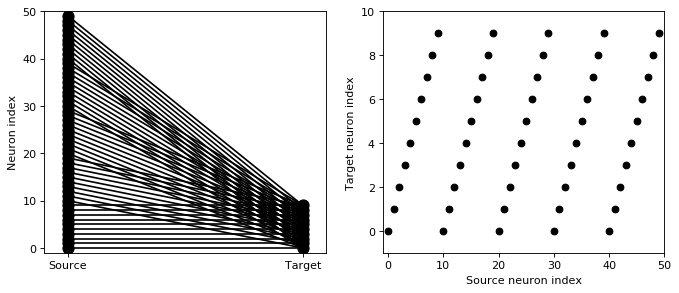

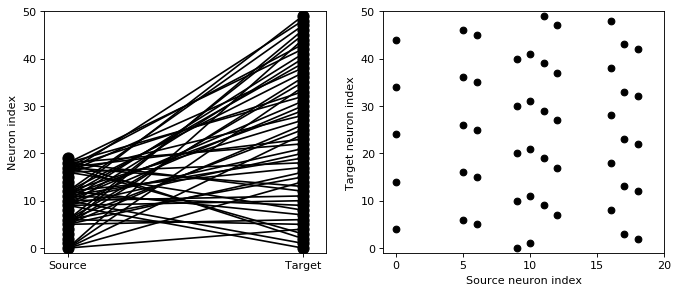

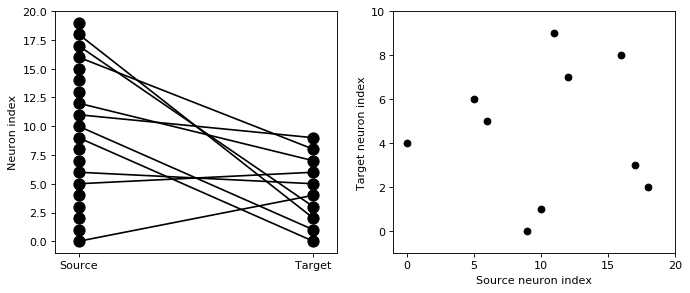

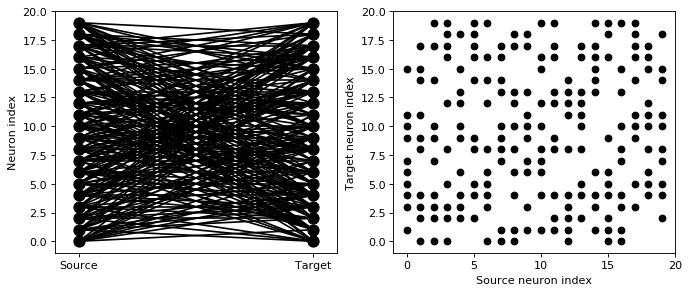

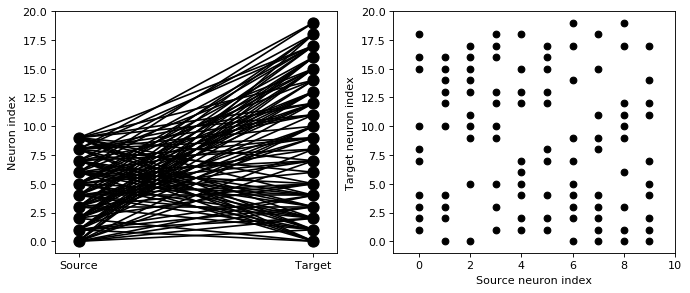

In [5]:
# Input Dummy
print('noise-dummy = noise',copy_noise_Coupled.i[:], 'dummy',copy_noise_Coupled.j[:])
# Dummy PC connection
print('dummy-PC = dummy',S_N_PC_Coupled.i[:], 'PC',S_N_PC_Coupled.j[:])
# IO Dummy connection
print('IO - dummy = ')
print('IO ',S_IO_N_Coupled.i[:],'dummy',S_IO_N_Coupled.j[:])
# IO PC connection
print('IO-PC = ')
print('IO =',Synapse_IO_PC_Coupled_STDP.i[:], 'PC',Synapse_IO_PC_Coupled_STDP.j[:])
# IO DCN connection
print('DCN - IO =')
print('DCN =',IO_DCN_Synapse_Coupled_STDP.i[:],'IO ',IO_DCN_Synapse_Coupled_STDP.j[:])
# DCN PC connection
print('PC - DCN =')
print('PC',DCN_PC_Synapse_Coupled_STDP.i[:],'DCN',DCN_PC_Synapse_Coupled_STDP.j[:])

visualise(S_N_PC_Coupled)
visualise(S_IO_N_Coupled)
visualise(Synapse_IO_PC_Coupled_STDP)
visualise(IO_DCN_Synapse_Coupled_STDP)
visualise(DCN_PC_Synapse_Coupled_STDP)

In [6]:
run(exp_runtime*2,report='text')

WARNING    The expression "N_Cells_DCN / 2" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


Starting simulation at t=0. s for a duration of 5. s
0.177825 (3%) simulated in 10s, estimated 4m 31s remaining.
0.3644 (7%) simulated in 20s, estimated 4m 14s remaining.
0.556825 (11%) simulated in 30s, estimated 3m 59s remaining.
0.768775 (15%) simulated in 40s, estimated 3m 40s remaining.
0.9632000000000001 (19%) simulated in 50s, estimated 3m 30s remaining.
1.1631 (23%) simulated in 1m 0s, estimated 3m 18s remaining.
1.366475 (27%) simulated in 1m 10s, estimated 3m 6s remaining.
1.5405 (30%) simulated in 1m 20s, estimated 3m 0s remaining.
1.6854750000000003 (33%) simulated in 1m 30s, estimated 2m 57s remaining.
1.857275 (37%) simulated in 1m 40s, estimated 2m 49s remaining.
2.054275 (41%) simulated in 1m 50s, estimated 2m 38s remaining.
2.251625 (45%) simulated in 2m 0s, estimated 2m 26s remaining.
2.454 (49%) simulated in 2m 10s, estimated 2m 15s remaining.
2.6083 (52%) simulated in 2m 20s, estimated 2m 8s remaining.
2.797775 (55%) simulated in 2m 30s, estimated 1m 58s remaining.


In [7]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved


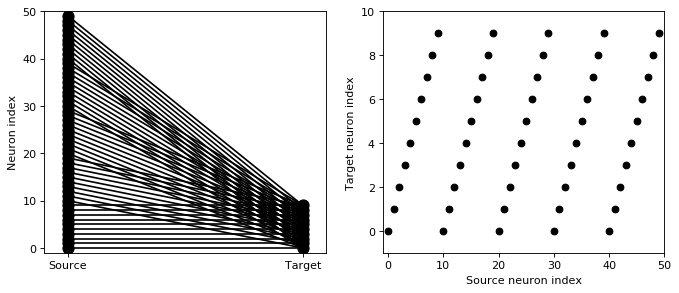

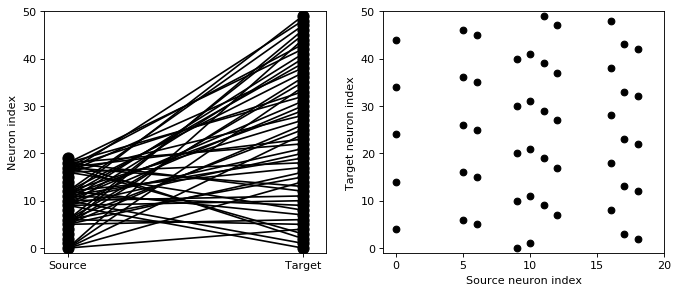

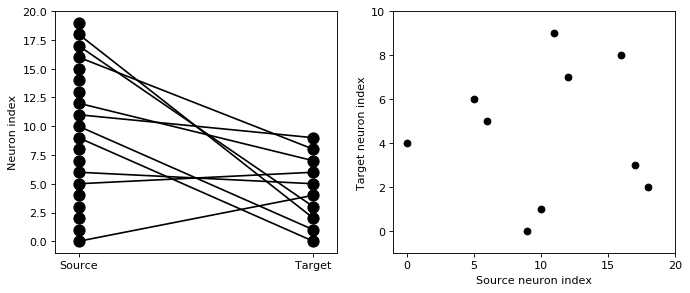

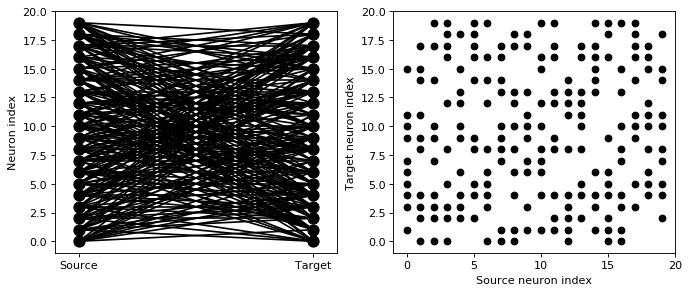

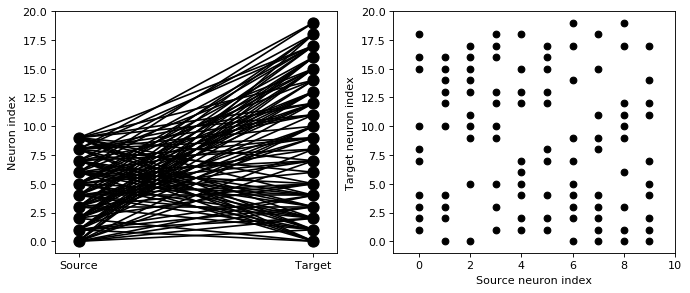

In [8]:
visualise(S_N_PC_Coupled)
visualise(S_IO_N_Coupled)
visualise(Synapse_IO_PC_Coupled_STDP)
visualise(IO_DCN_Synapse_Coupled_STDP)
visualise(DCN_PC_Synapse_Coupled_STDP)


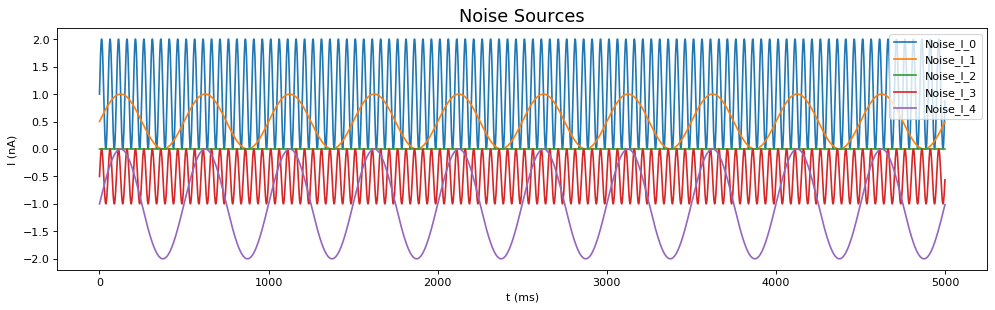

Plasticity


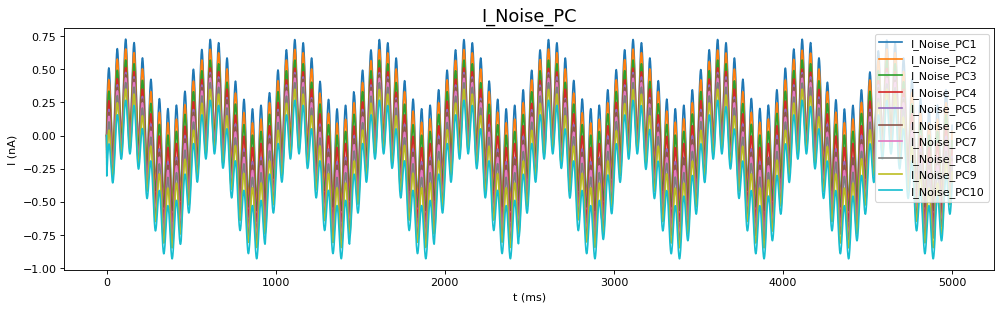

Plasticity Coupled Scenario


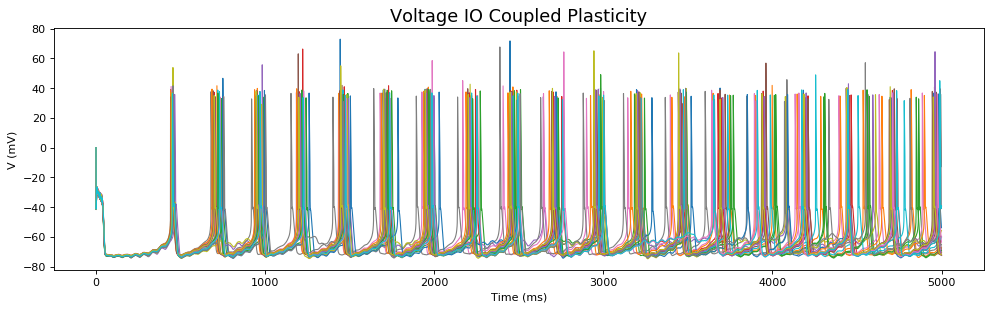

Number of spikes DCN: 277
Number of spikes DCN: 285
Number of spikes DCN: 285
Number of spikes DCN: 292
Number of spikes DCN: 290
Number of spikes DCN: 306
Number of spikes DCN: 334
Number of spikes DCN: 300
Number of spikes DCN: 324
Number of spikes DCN: 308


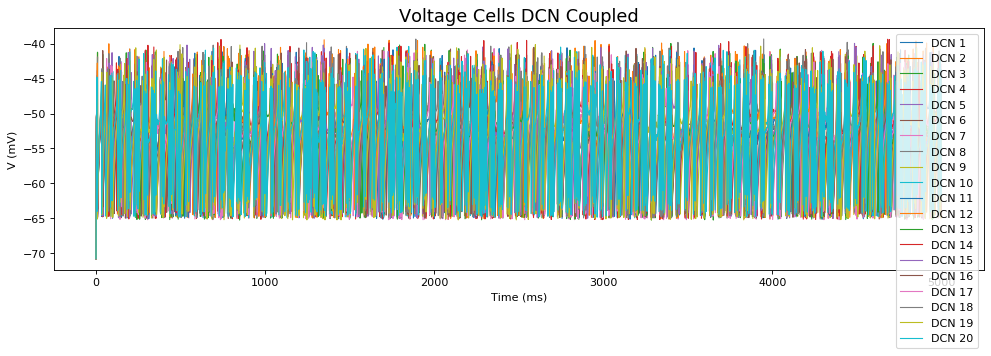

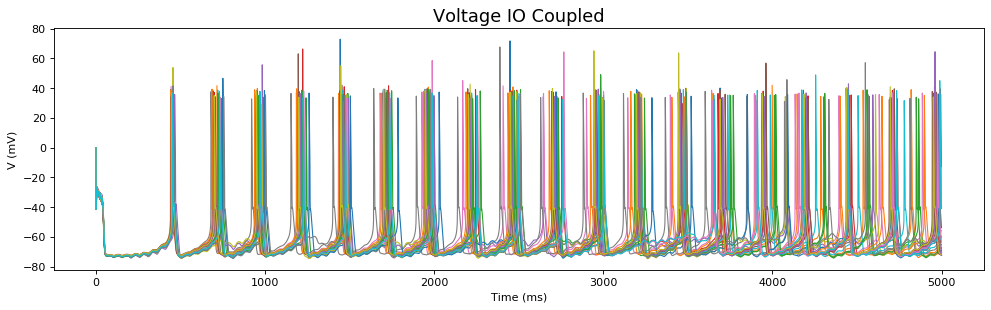

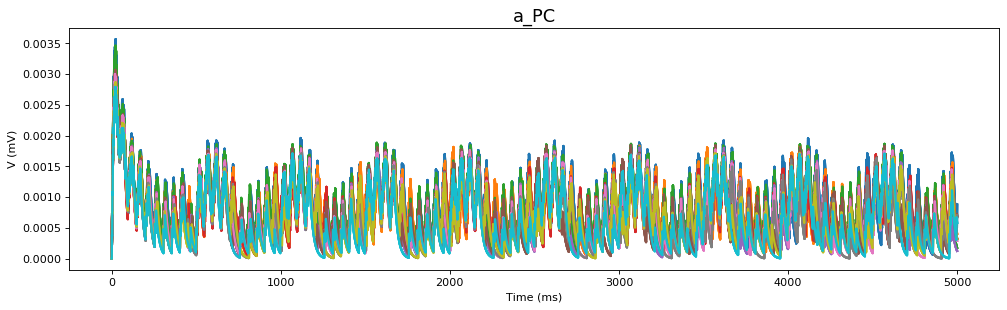

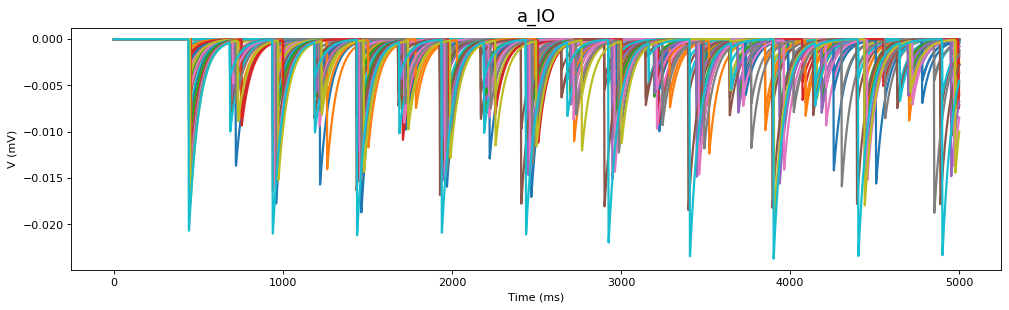

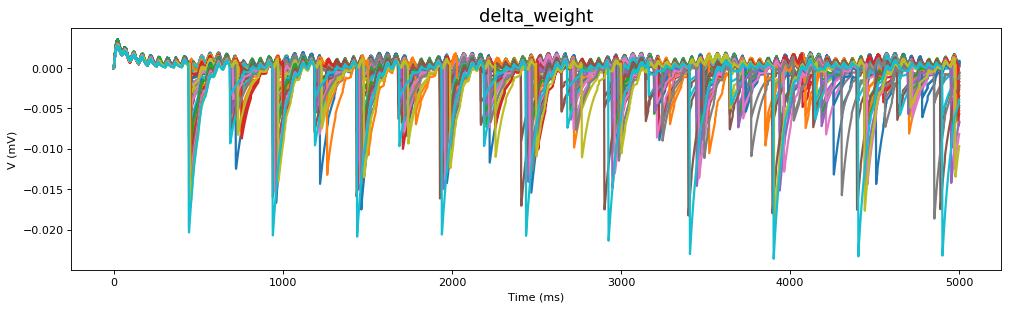

Plasticity Uncoupled Scenario


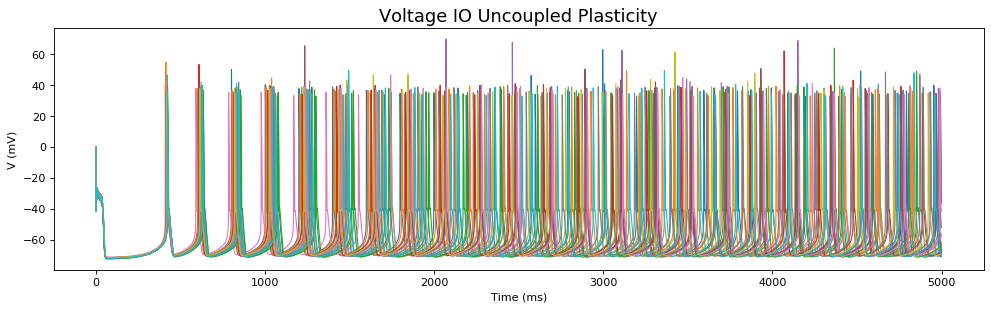

Number of spikes DCN: 282
Number of spikes DCN: 288
Number of spikes DCN: 287
Number of spikes DCN: 300
Number of spikes DCN: 289
Number of spikes DCN: 308
Number of spikes DCN: 348
Number of spikes DCN: 295
Number of spikes DCN: 331
Number of spikes DCN: 315


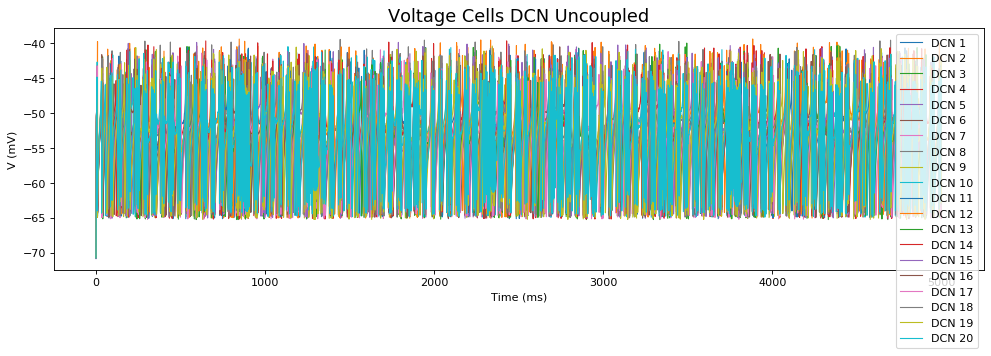

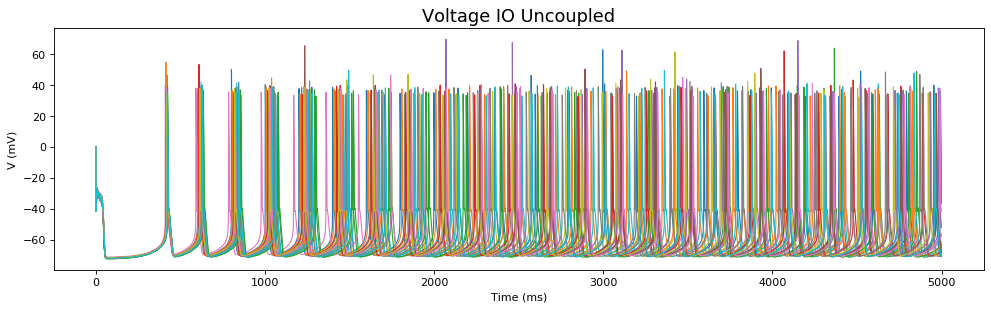

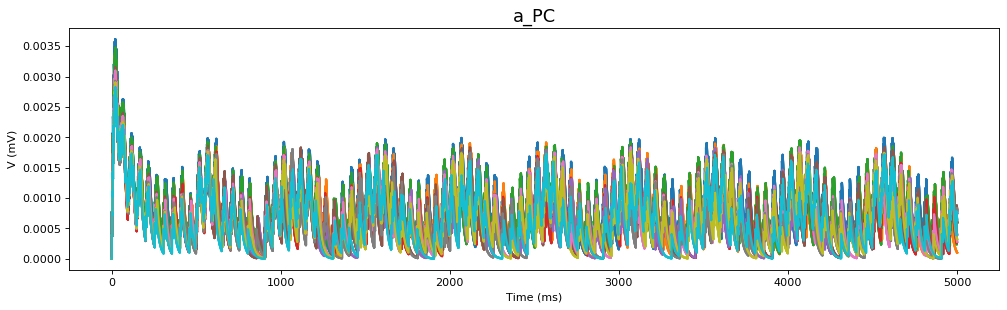

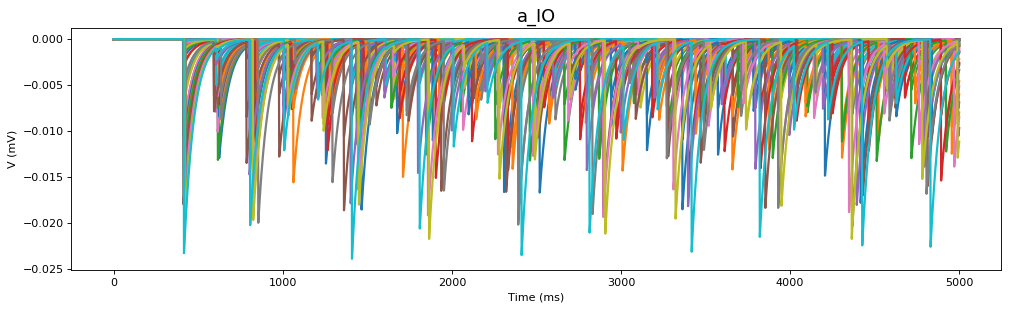

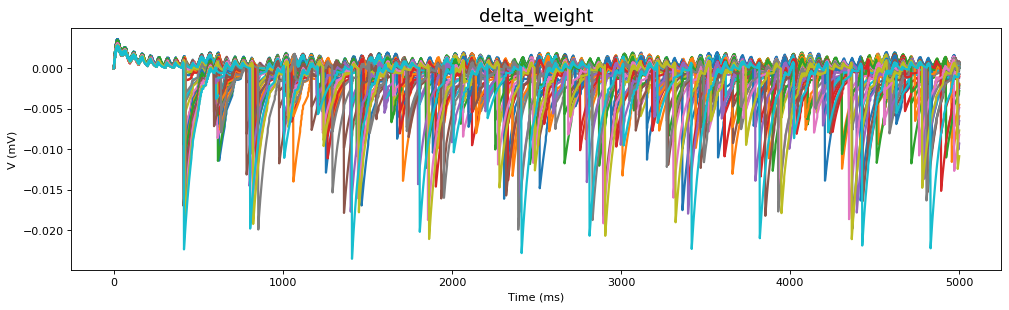

In [9]:
from G_Plot_Plasticity import *

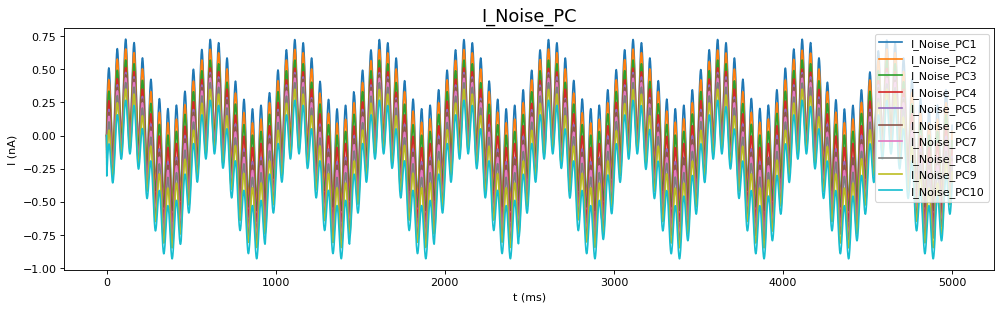

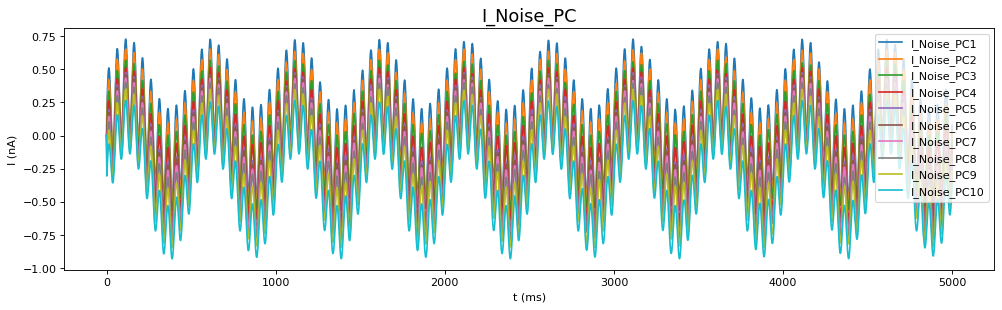

In [10]:
figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
title('I_Noise_PC', fontsize=16)
for pp in range(0,N_Cells_PC):
    plot(PC_Statemon_Coupled_STDP.t/ms,PC_Statemon_Coupled_STDP.I_Noise[pp]/nA, ('C'+str(pp)), label=('I_Noise_PC'+str(1+pp)))
legend(loc='best')
xlabel('t (ms)')
ylabel('I (nA)')
legend();
show() 

figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
title('I_Noise_PC', fontsize=16)
for pp in range(0,N_Cells_PC):
    plot(PC_Statemon_Uncoupled_STDP.t/ms,PC_Statemon_Uncoupled_STDP.I_Noise[pp]/nA, ('C'+str(pp)), label=('I_Noise_PC'+str(1+pp)))
legend(loc='best')
xlabel('t (ms)')
ylabel('I (nA)')
legend();
show() 

Number of spikes DCN: 282
Number of spikes PC: 523


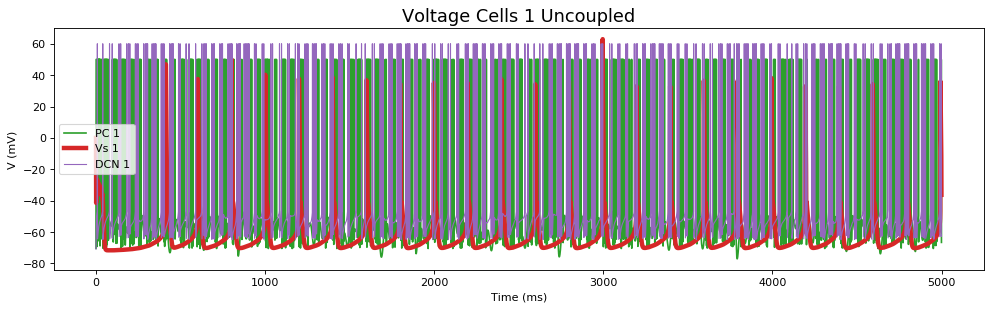

Number of spikes DCN: 288
Number of spikes PC: 479


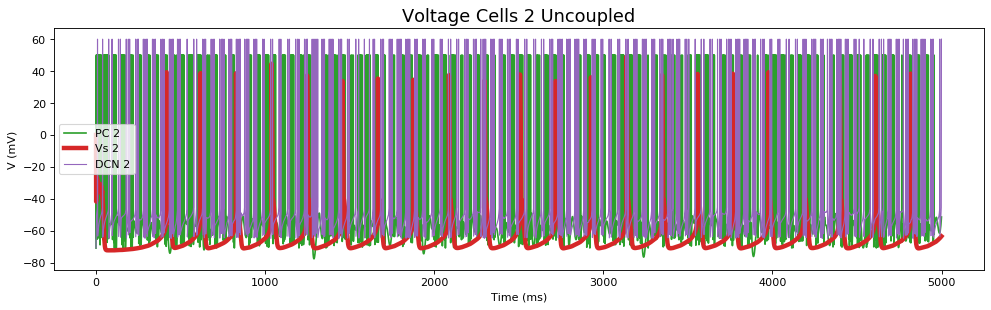

Number of spikes DCN: 287
Number of spikes PC: 512


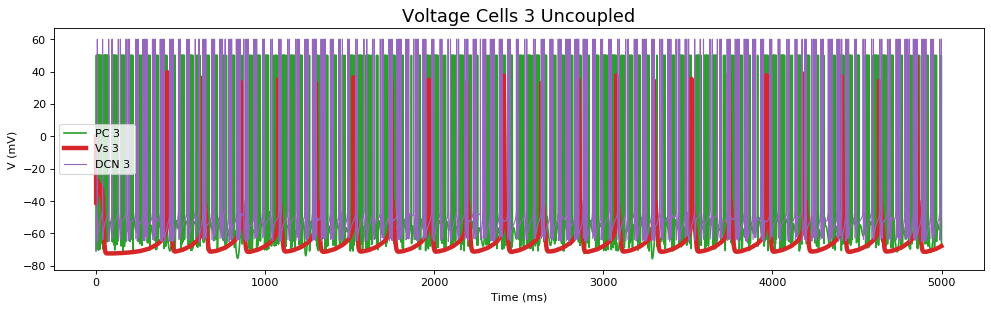

Number of spikes DCN: 300
Number of spikes PC: 420


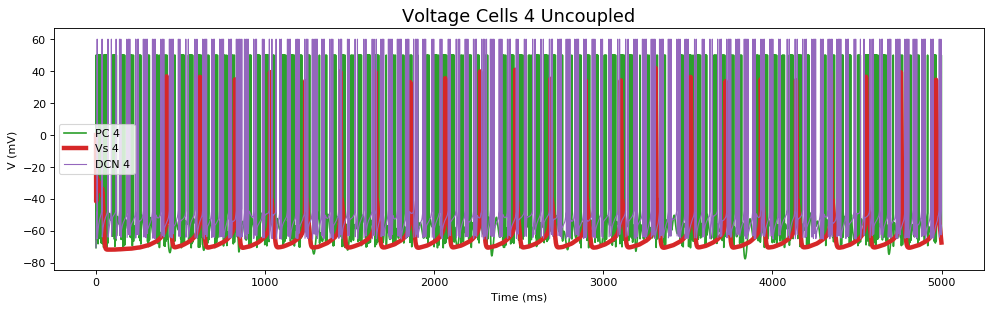

Number of spikes DCN: 289
Number of spikes PC: 418


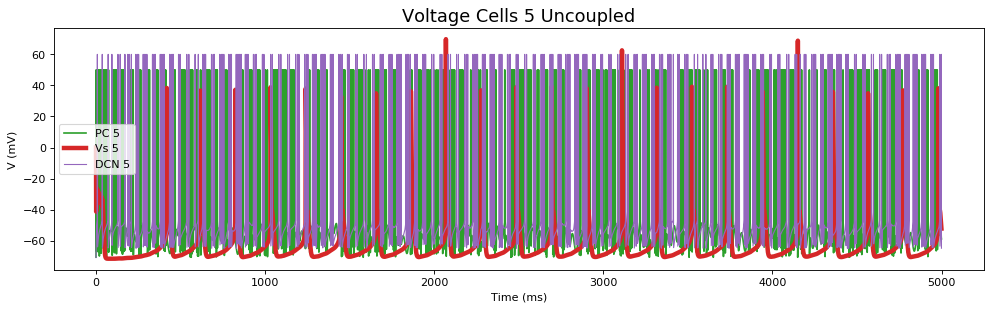

Number of spikes DCN: 308
Number of spikes PC: 433


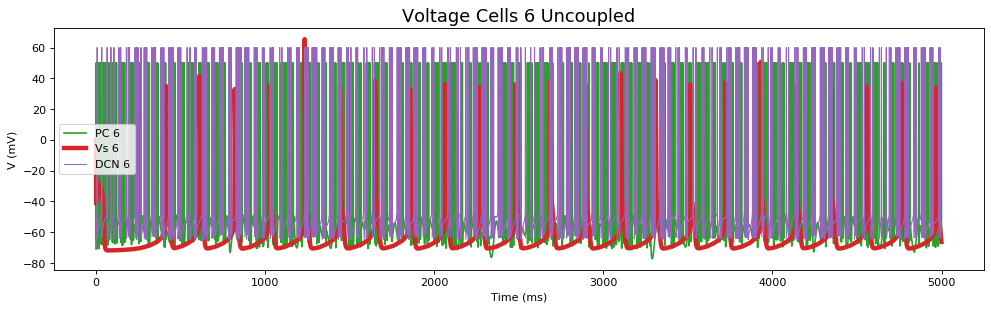

Number of spikes DCN: 348
Number of spikes PC: 423


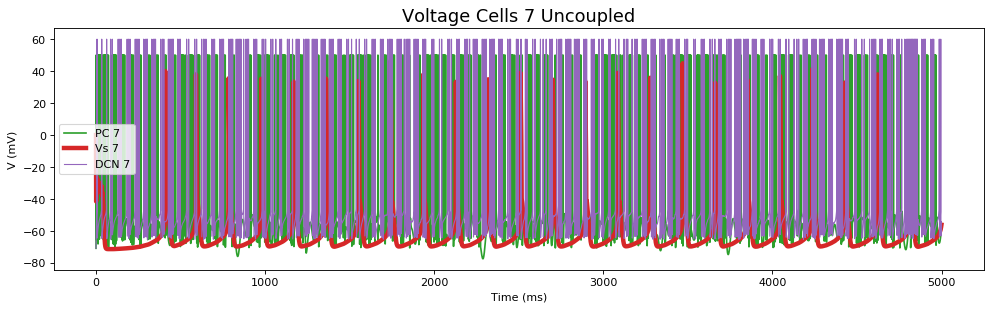

Number of spikes DCN: 295
Number of spikes PC: 387


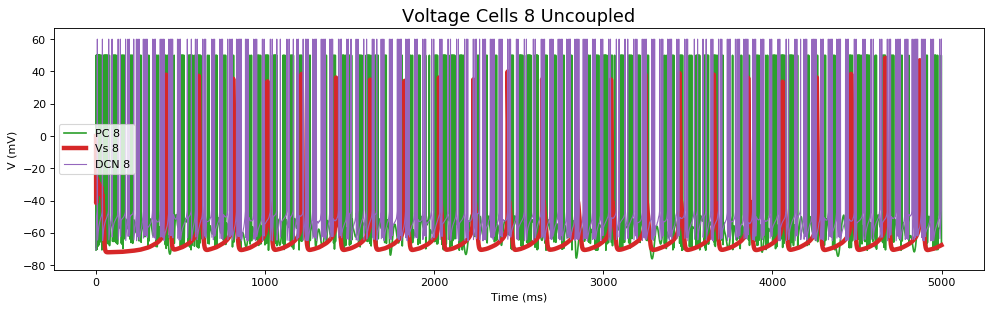

Number of spikes DCN: 331
Number of spikes PC: 389


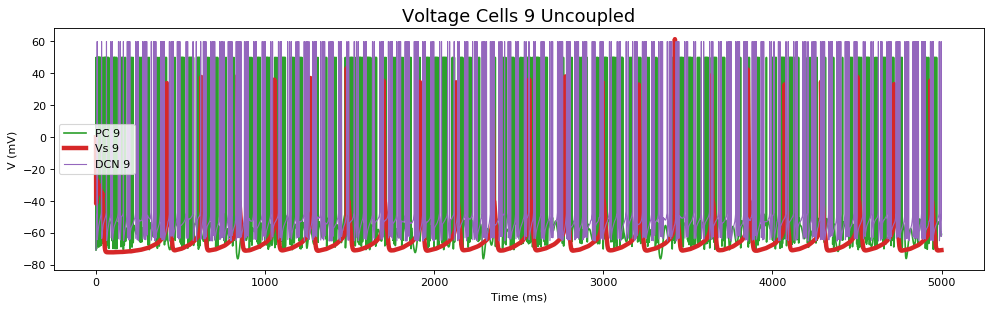

Number of spikes DCN: 315
Number of spikes PC: 368


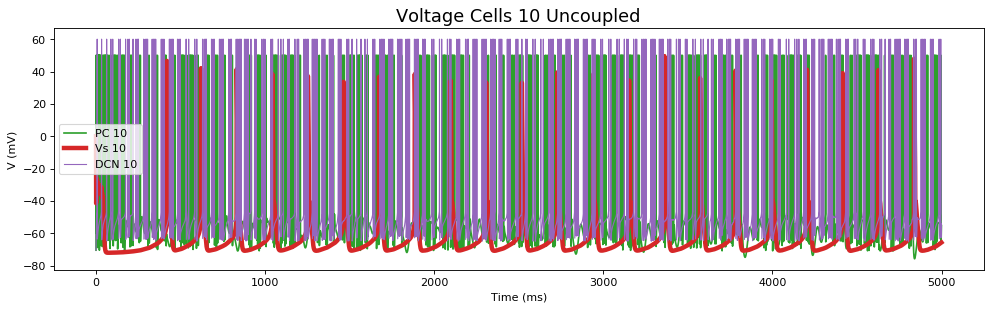

In [11]:
    for pp in range(0,N_Cells_PC,1):    
        DCN_spikes_Uncoupled_STDP = DCN_Statemon_Uncoupled_STDP.v[:]
        Times_DCN_Uncoupled_STDP = DCN_Spikemon_Uncoupled_STDP.values('t')[pp]/(t_Monitor)
        print("Number of spikes DCN: %s"% np.size(Times_DCN_Uncoupled_STDP))
        for t in range(0,np.size(Times_DCN_Uncoupled_STDP),1):
            i = int(Times_DCN_Uncoupled_STDP[t])
            DCN_spikes_Uncoupled_STDP[pp][i] = 60*mV
        PC_spikes_Uncoupled_STDP = PC_Statemon_Uncoupled_STDP.v[:]
        Times_PC_Uncoupled_STDP = PC_Spikemon_Uncoupled_STDP.values('t')[pp]/(t_Monitor)
        print("Number of spikes PC: %s"% np.size(Times_PC_Uncoupled_STDP))
        for t in range(0,np.size(Times_PC_Uncoupled_STDP),1):
            i = int(Times_PC_Uncoupled_STDP[t])
            PC_spikes_Uncoupled_STDP[pp][i] = 50*mV
        figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
        title('Voltage Cells '+str(pp+1) + ' Uncoupled', fontsize=16)
        plot(PC_Statemon_Uncoupled_STDP.t/ms, PC_spikes_Uncoupled_STDP[pp]/mV, ('C'+str(2)), label=('PC'+' '+str(pp+1)))
        plot(IO_Statemon_Uncoupled_STDP.t/msecond, IO_Statemon_Uncoupled_STDP.Vs[pp]/mvolt, ('C'+str(3)), lw='4', label=('Vs'+' '+str(pp+1)))
        plot(DCN_Statemon_Uncoupled_STDP.t/ms, DCN_spikes_Uncoupled_STDP[pp]/mV, ('C'+str(4)), lw='1',label=('DCN'+' '+str(pp+1)))
        legend(loc='best')
        xlabel('Time (ms)')
        ylabel('V (mV)')
        legend();
        show()

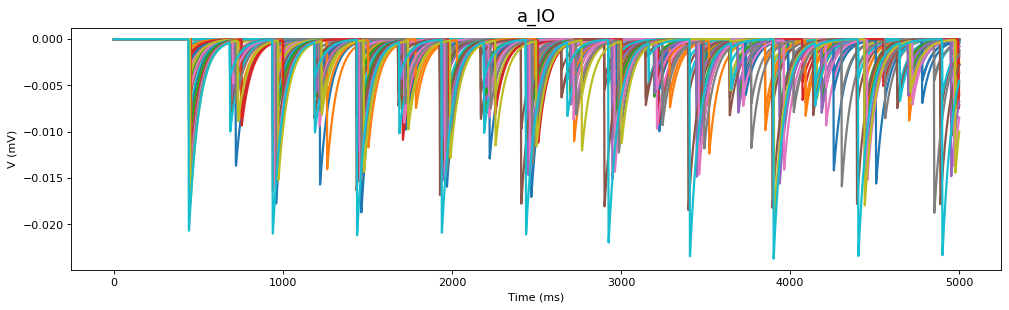

In [12]:
figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
title('a_IO', fontsize=16)
for pp in range(0,n_Noise*n_PC,1):
    plot(mon_N_PC_Coupled.t/msecond, mon_N_PC_Coupled.a_IO[pp], ('C'+str(pp)), lw='2')
xlabel('Time (ms)')
ylabel('V (mV)')
show()

In [13]:
# relate IO spike to input after multiplication with weight of dummy variable

In [14]:
# Input Dummy
print('noise-dummy = noise',copy_noise_Coupled.i[:], 'dummy',copy_noise_Coupled.j[:])
# Dummy PC connection
print('dummy-PC = dummy',S_N_PC_Coupled.i[:], 'PC',S_N_PC_Coupled.j[:])
# IO Dummy connection
print('IO - dummy = ')
print('IO ',S_IO_N_Coupled.i[:],'dummy',S_IO_N_Coupled.j[:])
# IO PC connection
print('IO-PC = ')
print('IO =',Synapse_IO_PC_Coupled_STDP.i[:], 'PC',Synapse_IO_PC_Coupled_STDP.j[:])
# IO DCN connection
print('DCN - IO =')
print('DCN =',IO_DCN_Synapse_Coupled_STDP.i[:],'IO ',IO_DCN_Synapse_Coupled_STDP.j[:])
# DCN PC connection
print('PC - DCN =')
print('PC',DCN_PC_Synapse_Coupled_STDP.i[:],'DCN',DCN_PC_Synapse_Coupled_STDP.j[:])

noise-dummy = noise [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4] dummy [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
dummy-PC = dummy [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] PC [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9]
IO - dummy = 
IO  [ 9 10 18 17  0  6  5 12 16 11  9 10 18 17  0  6  5 12 16 11  9 10 18 17
  0  6  5 12 16 11  9 10 18 17  0  6  5 12 16 11  9 10 18 17  0  6  5 12
 16 11] dummy [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
IO-PC = 
IO = [ 9 10 18 17  0  6  5 12 16 11] PC [0 1 2 3 4 5 6 7 8 9]
DCN - IO =
DCN = [ 0  0  0  0  0  0  

In [15]:
from F_save_data_Plasticity import *